## Куприхин Дмитрий Альбертович
### 19-ИВТ-2
#### Лабораторная работа 3
#### Вариант 1

In [19]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  precision_recall_curve, average_precision_score, plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
mr = pd.read_csv('mushrooms.csv')
mr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. cap-shap - Форма шляпки
2. cap-surface - Поверхность шляпки
3. cap-color - Цвет шляпки
4. bruises - Пятна
5. odor - Запах
6. gill-attachment - Форма жабер
7. gill-spacing - Расстояние между жабрами
8. gill-size - Размер жабер
9. gill-color - Цвет жабер
10. stalk-shape - Форма ножки
11. stalk-root - Корень
12. stalk-surface-above-ring - Форма ножки выше юбки
13. stalk-surface-below-ring - Форма ножки ниже юбки
14. stalk-color-above-ring - Цвет ножки выше юбки
15. stalk-color-below-ring - Цвет ножки ниже юбки
16. veil-type - Форма юбки
17. veil-color - Цвет юбки
18. ring-number - Количество колец
19. ring-type - Тип кольца
20. spore-print-color - Цвет спор
21. population - Популяция
22. habitat - Среда обитания

### 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [3]:
mr.shape

(8124, 23)

In [4]:
drop_mr = mr.drop_duplicates()
drop_mr.shape

(8124, 23)

### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='class', ylabel='count'>

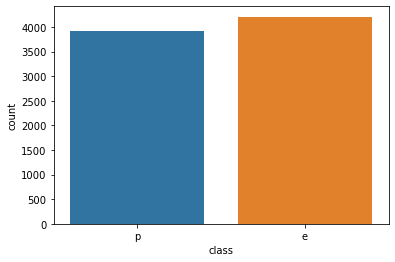

In [5]:
sns.countplot(data=mr, x='class')


### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

нет количественных признаков 

### 5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [6]:
mr.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
for column in list(mr):
    mr[column] = pd.Series(LabelEncoder().fit_transform(mr[column]))

mr.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0

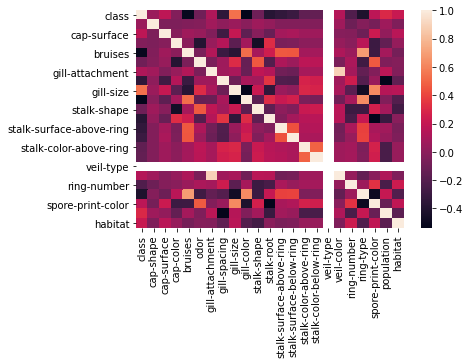

In [8]:
corr_matrix = mr.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

In [9]:
mr.drop('veil-type',axis= 1,inplace = True)

### 7.	Заполните пропущенные значения в данных;

In [10]:
mr.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

пустые значения осутствует

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [11]:
data_X, data_Y = mr.drop(columns="class", axis=1).values, mr["class"].values
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

In [12]:
#1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(train_x, train_y)

n = search.best_estimator_.n_neighbors# самое лучшее значение
best = search.best_score_# наивысший средний балл
print('best:', best, ', neighbors num:', n, sep=' ')

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
print('Accuracy knn: %.5f' % accuracy_score(test_y, knn_predict))

best: 0.9998240985048372 , neighbors num: 1
Accuracy knn: 1.00000


In [13]:
#3 – линейный классификатор (персептрон);
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(train_x, train_y)# обучаем
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(train_x, train_y)
ppn_predict = ppn.predict(test_x)
print('Accuracy ppn: %.5f' % accuracy_score(test_y, ppn_predict))# оцениваем точность

best: 0.9344000259678833 alpha: 0.05263157894736842 max_iter: 13
Accuracy ppn: 0.94381


#### PR график

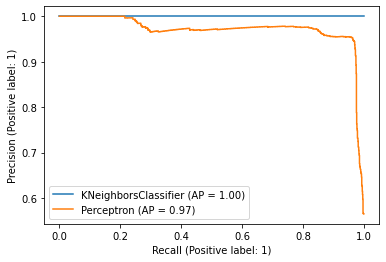

In [21]:
a = plot_precision_recall_curve(knn, test_x, test_y)
b = plot_precision_recall_curve(ppn, test_x, test_y, ax = a.ax_)

#### ROC графики

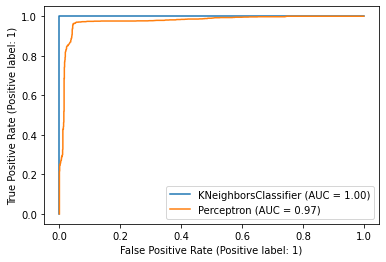

In [23]:
c = plot_roc_curve(knn, test_x, test_y)
d = plot_roc_curve(ppn, test_x, test_y, ax = c.ax_)

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы

###### имеют одинаковые показатели качества(если увеличить количество данных, то они также будут иметь примерные показатели)